1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [56]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format='retina'

rcParams['figure.figsize'] = 13,8

#### Загружаем данные и формируем датасет

In [2]:
iris = load_iris()

In [25]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = data[['sepal_length', 'sepal_width']]

data_class = iris.target

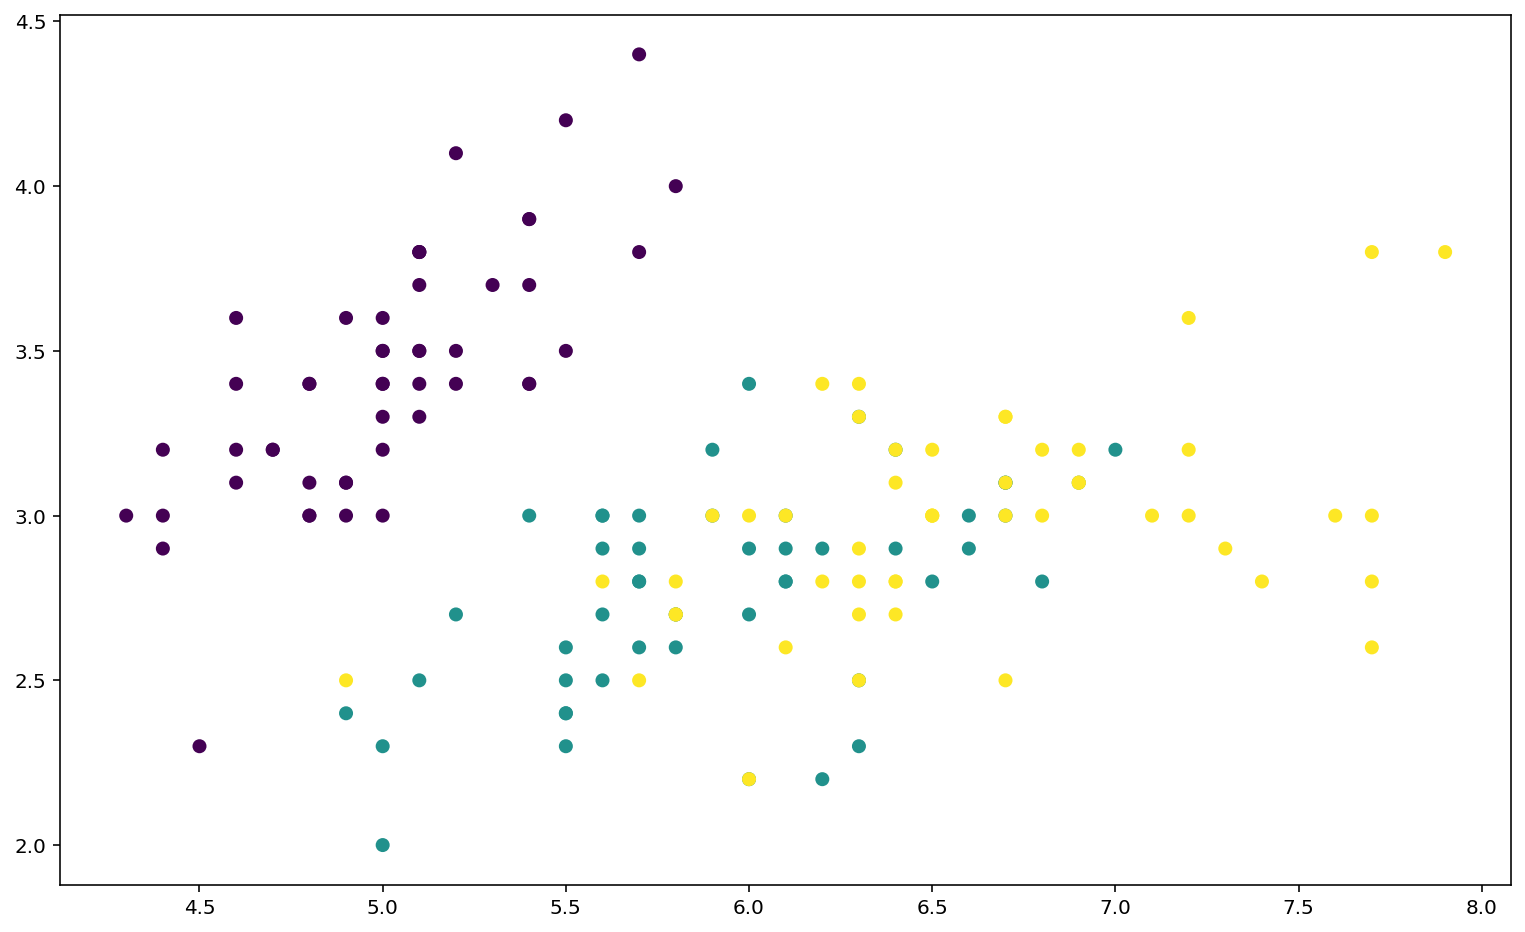

In [85]:
plt.scatter(data['sepal_length'], data['sepal_width'], c=data_class)

#### Разделим данные на выборку для обучения и для тестирования в пропорции 70/30

In [69]:
x_train, x_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3)

#### Обучаем модель LDA

In [70]:
lda = LinearDiscriminantAnalysis()

In [71]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [77]:
y_predict = lda.predict(x_test)
y_predict

array([1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0])

In [73]:
result = pd.DataFrame([y_test, lda.predict(x_test)]).T
result.head()

,0,1
0,1,1
1,2,2
2,0,0
3,2,2
4,2,2


In [74]:
accuracy_score(y_test, lda.predict(x_test))

0.8222222222222222

#### Визуализируем предсказания для тестовой выборки и отметим центры классов

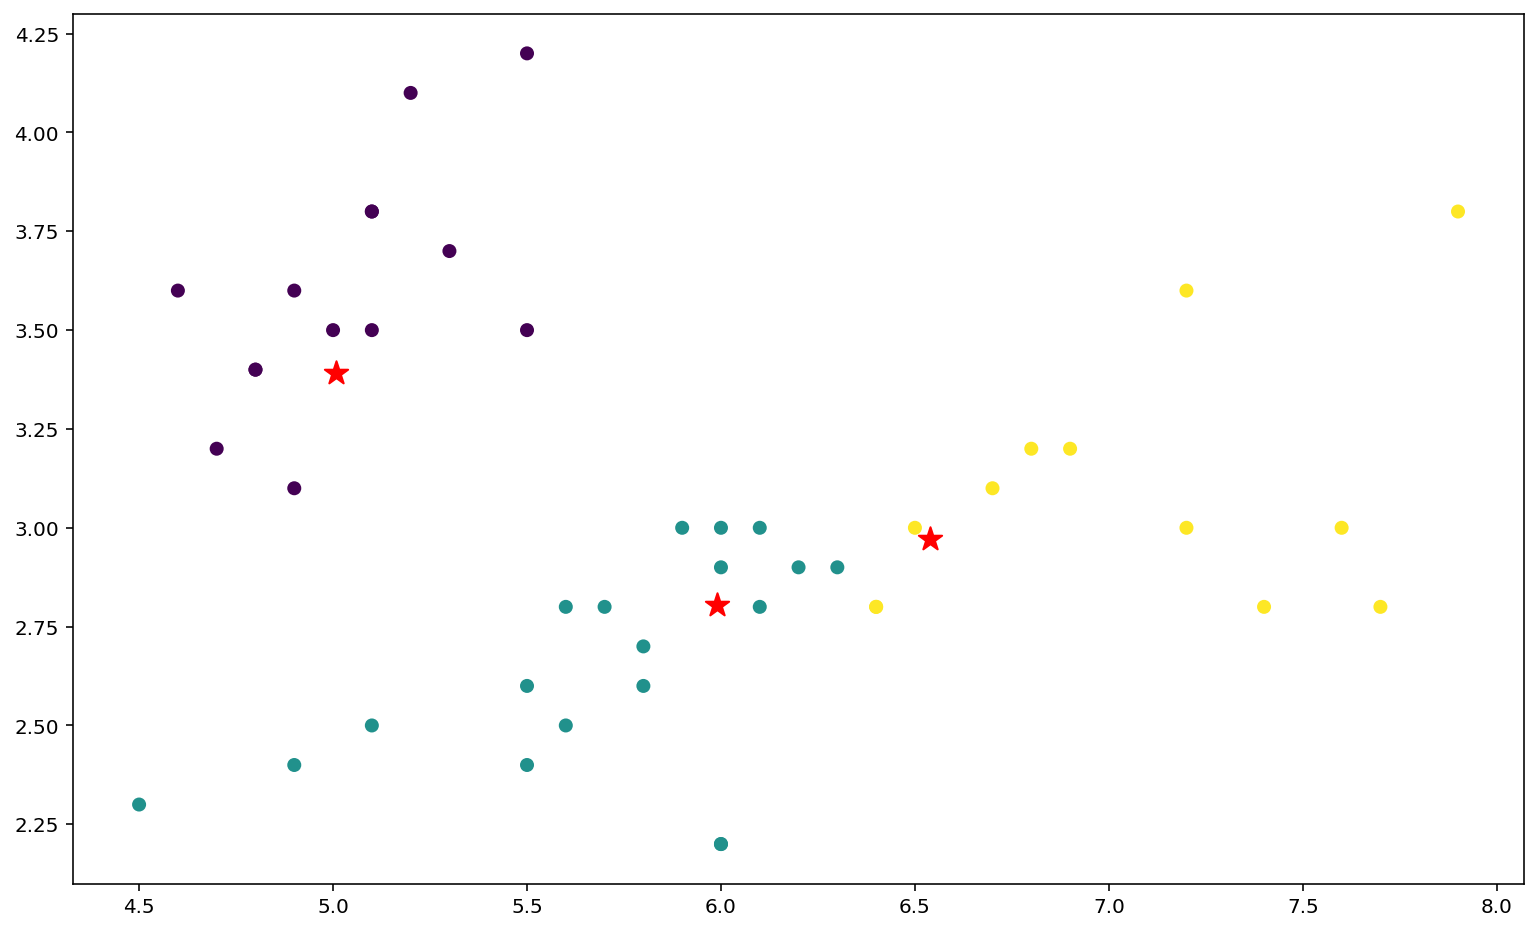

In [82]:
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_predict)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

#### Подберем оптимальное количество кластеров, используя метод локтя

In [86]:
from sklearn.cluster import KMeans

In [103]:
k_inertias = []
clusters_counts = range(1, 20)

for cluster_count in clusters_counts:
  kmeans = KMeans(n_clusters=cluster_count)
  kmeans.fit_predict(data)
    
  k_inertias.append(kmeans.inertia_)

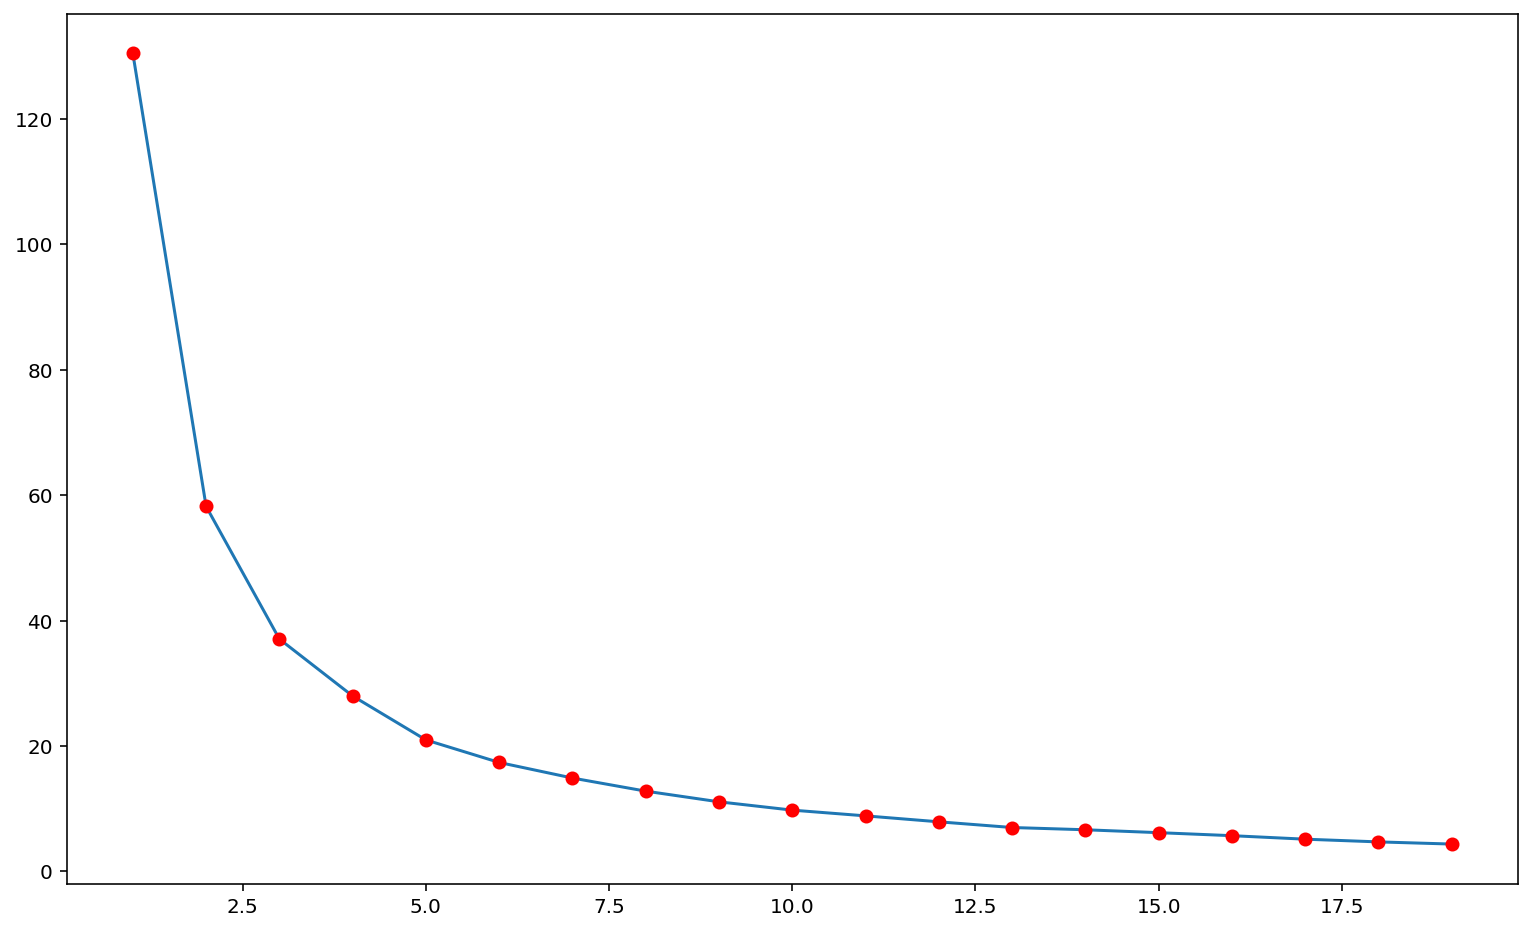

In [104]:
plt.plot(clusters_counts, k_inertias)
plt.plot(clusters_counts, k_inertias ,'ro')

#### Думаю, что в данном случае можно выбрать оптимальное количество кластеров, равное 4

In [105]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data)
clusters

array([3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 3, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

#### Визуализируем полученную кластеризацию

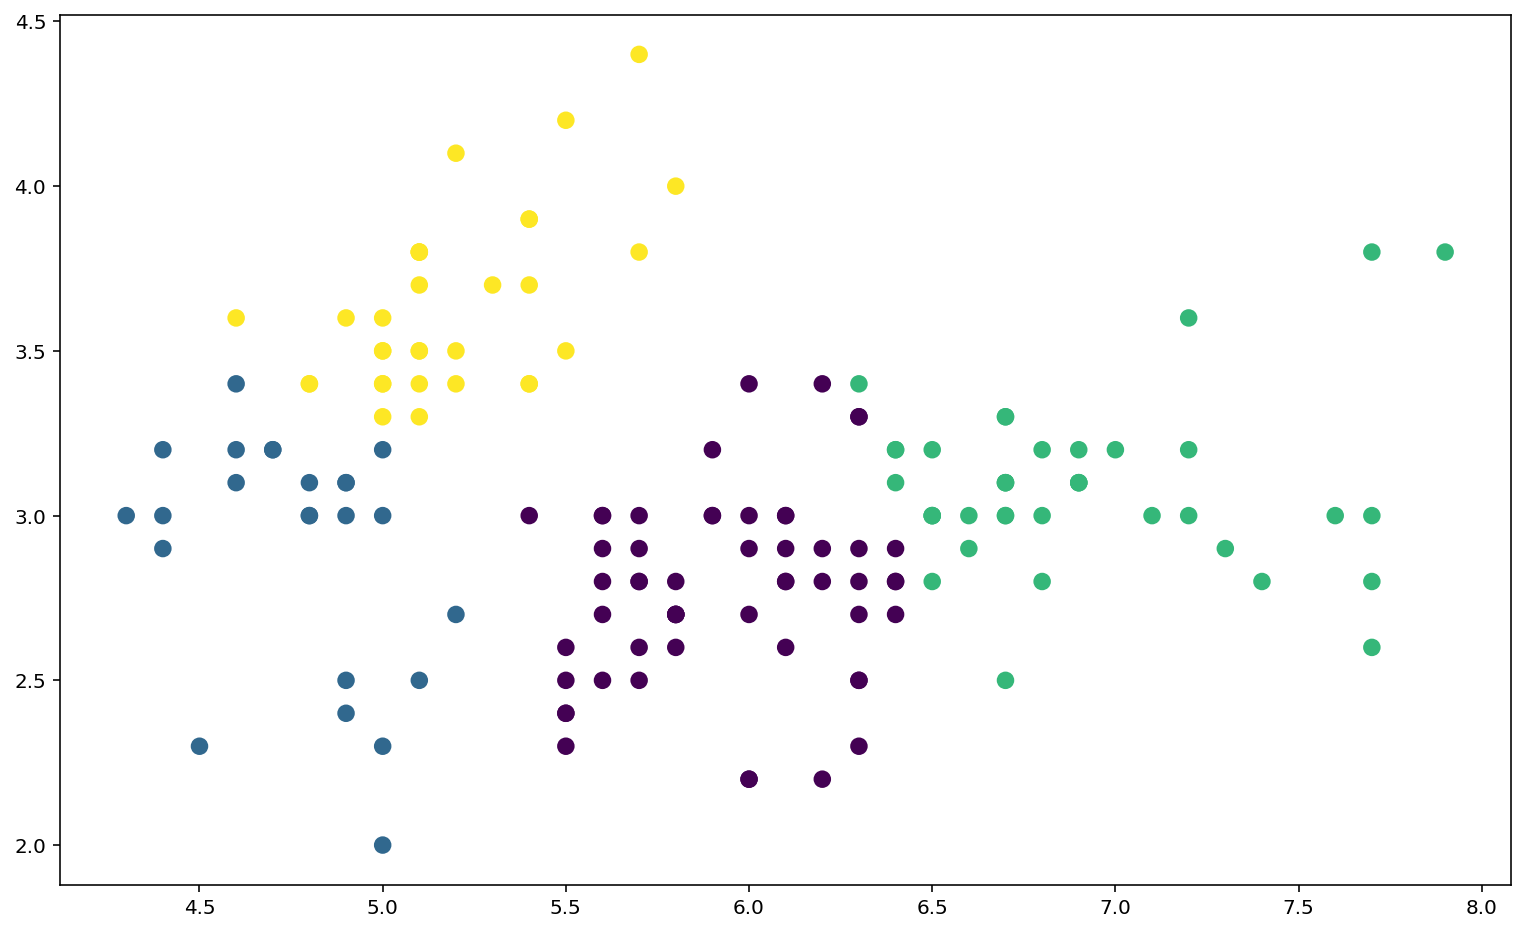

In [107]:
plt.scatter(data['sepal_length'], data['sepal_width'], c=clusters, s=60)